<a href="https://colab.research.google.com/github/NikhileshSarangpure/Malaysian-Indian-Export-price-analysis-and-forecasting-using-Neural-Network/blob/main/Malayasia_Pacific_Industry_Berhad_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/D&o.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,GDP,Balance of trade,Total Population,...,Total deaths,People Vaccinated,Uncertainty index,MYR/USD,Unemployment rate,Inflation rate,Interest rate,FTSE Bursa Malaysia KLCI,WTI Crude Oil,Brent Crude Oil
0,02-01-2019,0.710,0.71,0.695,0.695,0.680154,382300,342400000000,11514200000,31949777,...,0,0,0.15868,0.242160,0.033,-0.005,0.0318,1668.109985,46.31,54.06
1,03-01-2019,0.705,0.71,0.700,0.700,0.685047,1198300,342400000000,11514200000,31949777,...,0,0,0.15868,0.241838,0.033,-0.005,0.0324,1675.829956,46.92,53.23
2,04-01-2019,0.695,0.70,0.690,0.690,0.675261,691800,342400000000,11514200000,31949777,...,0,0,0.15868,0.241546,0.033,-0.005,0.0320,1669.780029,47.76,55.64
3,07-01-2019,0.695,0.72,0.695,0.720,0.704620,1358700,342400000000,11514200000,31949777,...,0,0,0.15868,0.242601,0.033,-0.005,0.0318,1679.170044,48.27,57.10
4,08-01-2019,0.725,0.73,0.710,0.720,0.704620,684700,342400000000,11514200000,31949777,...,0,0,0.15868,0.243173,0.033,-0.005,0.0318,1672.760010,49.58,56.91


In [ ]:
df.shape

(737, 21)

In [ ]:
df.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
GDP                          0
Balance of trade             0
Total Population             0
Total cases                  0
Total deaths                 0
People Vaccinated            0
Uncertainty index            0
MYR/USD                      1
Unemployment rate            0
Inflation rate               0
Interest rate                0
FTSE Bursa Malaysia KLCI     2
WTI Crude Oil               23
Brent Crude Oil             12
dtype: int64

In [ ]:
df = df.interpolate(method = 'spline', order = 3)
display(df.isna().sum())

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
GDP                         0
Balance of trade            0
Total Population            0
Total cases                 0
Total deaths                0
People Vaccinated           0
Uncertainty index           0
MYR/USD                     0
Unemployment rate           0
Inflation rate              0
Interest rate               0
FTSE Bursa Malaysia KLCI    0
WTI Crude Oil               0
Brent Crude Oil             0
dtype: int64

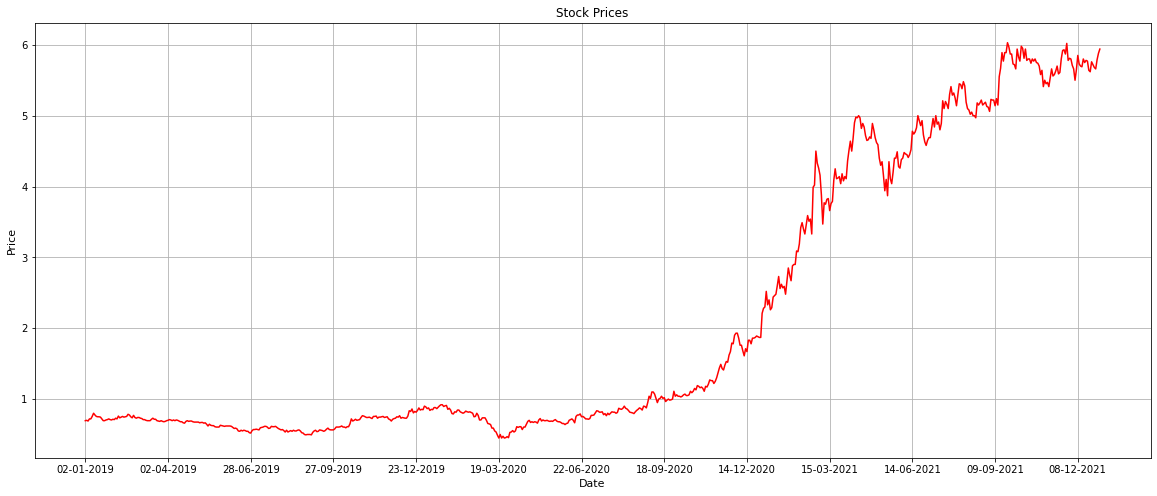

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'],df['Close'],color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Price',fontsize='11')
plt.title('Stock Prices')
plt.grid()
plt.show()

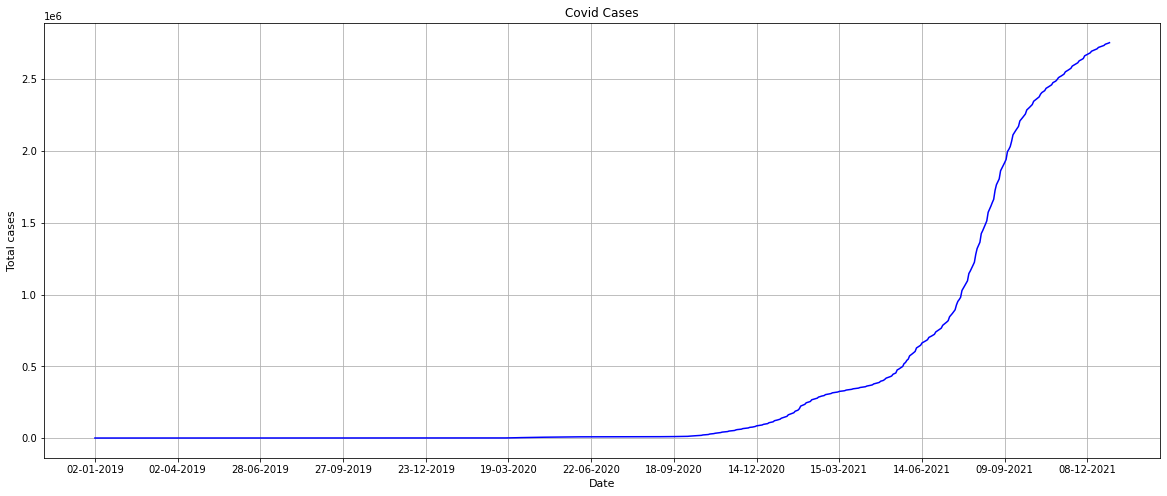

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'],df['Total cases'],color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Total cases',fontsize='11')
plt.title('Covid Cases')
plt.grid()
plt.show()

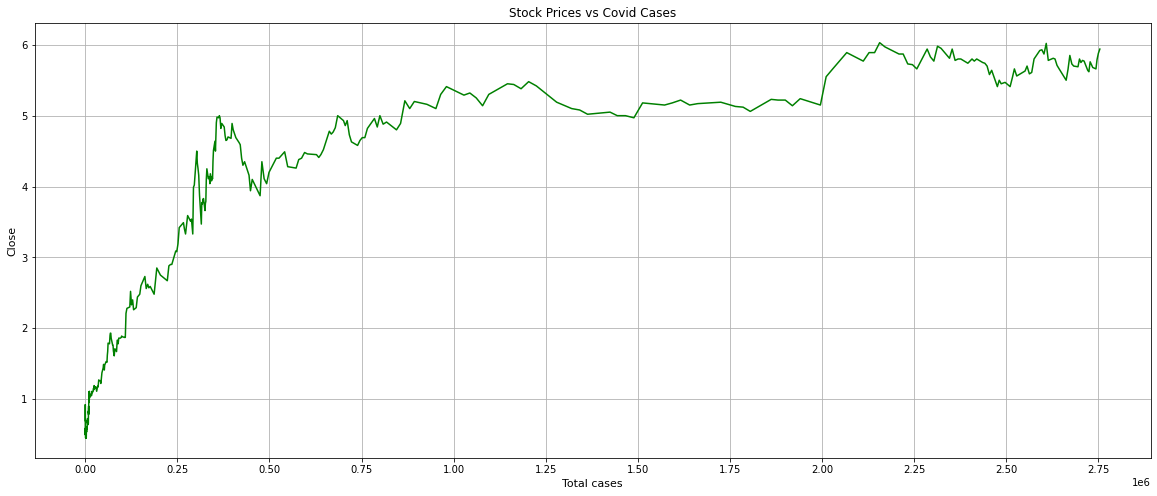

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(df['Total cases'],df['Close'],color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Total cases',fontsize='11')
ax.set_ylabel('Close',fontsize='11')
plt.title('Stock Prices vs Covid Cases')
plt.grid()
plt.show()

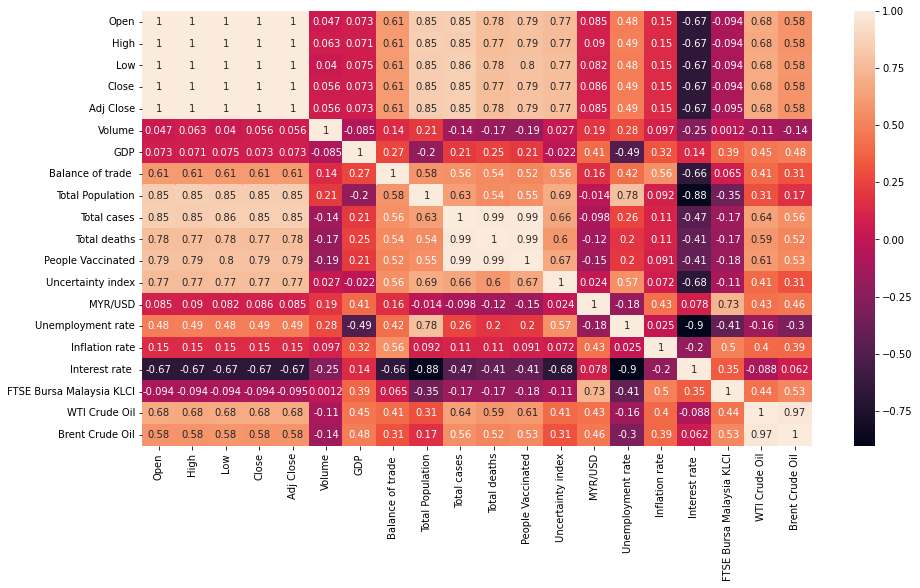

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
#define the features
X = df.iloc[:,df.columns!="Close"].values
y = df.iloc[:,5].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	18
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	18
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	18
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	18
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	19


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	19


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=14, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F1DF8F28490),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F1DF8F28490, verbose=2)

In [ ]:
# select the top 10 features
top_features = df.columns[df.columns!="Close"][feat_selector.ranking_ <= 14].tolist()
top_features

['Open',
 'High',
 'Low',
 'Adj Close',
 'Volume',
 'Balance of trade ',
 'Total cases',
 'MYR/USD',
 'Inflation rate',
 'Interest rate ',
 'FTSE Bursa Malaysia KLCI',
 'WTI Crude Oil',
 'Brent Crude Oil']

In [ ]:
corrmap = df.corr()

In [ ]:
df.corrwith(df["Close"])

Open                        0.999160
High                        0.999703
Low                         0.999522
Close                       1.000000
Adj Close                   0.999998
Volume                      0.056027
GDP                         0.072696
Balance of trade            0.610752
Total Population            0.848760
Total cases                 0.851671
Total deaths                0.774679
People Vaccinated           0.792443
Uncertainty index           0.770288
MYR/USD                     0.086324
Unemployment rate           0.485827
Inflation rate              0.147724
Interest rate              -0.670017
FTSE Bursa Malaysia KLCI   -0.094030
WTI Crude Oil               0.682184
Brent Crude Oil             0.581318
dtype: float64

In [ ]:
def get_corelated_col(cor_dat, threshold):
  feature=[]
  value=[]

  for i, index in enumerate(cor_dat.index):
    if abs(cor_dat[index])>threshold:
      feature.append(index)
      value.append(cor_dat[index])


  data = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
  return data

In [ ]:
top_corelated_values = get_corelated_col(corrmap['Close'],0.5)
top_corelated_values

,corr_value
Open,0.999160
High,0.999703
Low,0.999522
Close,1.000000
Adj Close,0.999998
Balance of trade,0.610752
Total Population,0.848760
Total cases,0.851671
Total deaths,0.774679
People Vaccinated,0.792443


In [ ]:
X_top = df[top_features]
y = df['Close']

In [ ]:
# new dataset
data = pd.concat([pd.DataFrame(X_top), pd.DataFrame(y)], axis=1)
data.shape

(737, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,Open,High,Low,Adj Close,Volume,Balance of trade,Total cases,MYR/USD,Inflation rate,Interest rate,FTSE Bursa Malaysia KLCI,WTI Crude Oil,Brent Crude Oil,Close
0,0.046181,0.043096,0.048270,0.041818,0.006836,0.438581,0.0,0.690520,0.564103,0.949045,0.877544,0.679253,0.586378,0.043907
1,0.045293,0.043096,0.049180,0.042695,0.021426,0.438581,0.0,0.677390,0.564103,0.987261,0.892653,0.684228,0.575548,0.044803
2,0.043517,0.041337,0.047359,0.040940,0.012370,0.438581,0.0,0.665484,0.564103,0.961783,0.880813,0.691078,0.606994,0.043011
3,0.043517,0.044855,0.048270,0.046206,0.024294,0.438581,0.0,0.708502,0.564103,0.949045,0.899190,0.695237,0.626044,0.048387
4,0.048845,0.046614,0.051002,0.046206,0.012243,0.438581,0.0,0.731825,0.564103,0.949045,0.886645,0.705921,0.623565,0.048387


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

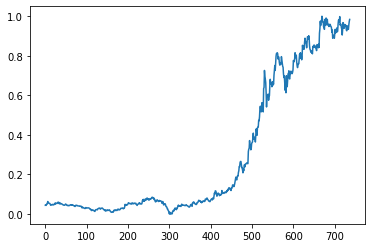

In [ ]:
temp = data['Close']
temp.plot()

In [ ]:
def df_to_X_Y(data, window_size=5):
  data_as_np = data.to_numpy()
  X = []
  Y = []
  for i in range(len(data_as_np)-window_size):
    row = [[a] for a in data_as_np[i:i+window_size]]
    X.append(row)
    label = data_as_np[i+window_size]
    Y.append(label)
  return np.array(X), np.array(Y)

In [ ]:
WINDOW_SIZE = 5
X, Y = df_to_X_Y(temp, WINDOW_SIZE)
X.shape, Y.shape

((732, 5, 1), (732,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape

(585, 5, 1)

In [ ]:
Y_test.shape

(147,)

In [ ]:
model_lstm=Sequential()
model_lstm.add(InputLayer((5, 1)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(8, 'relu'))
model_lstm.add(Dense(1, 'linear'))
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model_lstm.fit(X_train, Y_train, validation_split=0.10, epochs=100)

In [ ]:
train_predictions = model_lstm.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_test})
train_results

,Train Predictions,Actuals
0,0.805629,0.767025
1,0.039048,0.030466
2,0.229346,0.247312
3,0.888896,0.890681
4,0.066657,0.068100
...,...,...
142,0.844715,0.854839
143,0.225122,0.259857
144,0.024281,0.018817
145,0.242194,0.252688


In [ ]:
from sklearn.metrics import r2_score
Accuracy_lstm = r2_score(train_results['Train Predictions'],train_results['Actuals'])
Accuracy_lstm

0.9964136495470082

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 2056      
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train, Y_train, validation_split=0.10, epochs=100)

In [ ]:
train_predictions = model2.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_test})
train_results

,Train Predictions,Actuals
0,0.805985,0.767025
1,0.039552,0.030466
2,0.225655,0.247312
3,0.897929,0.890681
4,0.065678,0.068100
...,...,...
142,0.850537,0.854839
143,0.232914,0.259857
144,0.023307,0.018817
145,0.243706,0.252688


In [ ]:
from sklearn.metrics import r2_score
Accuracy_cnn = r2_score(train_results['Train Predictions'],train_results['Actuals'])
Accuracy_cnn

0.9969769180385802

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(Dense(64, kernel_initializer= 'uniform'))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5, 64)             128       
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_13 (Dense)            (None, 8)                 2568      
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,705
Trainable params: 2,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train, Y_train, validation_split=0.10, epochs=100)

In [ ]:
train_predictions = model3.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_test})
train_results

,Train Predictions,Actuals
0,0.808205,0.767025
1,0.039372,0.030466
2,0.225824,0.247312
3,0.897542,0.890681
4,0.066868,0.068100
...,...,...
142,0.851424,0.854839
143,0.224563,0.259857
144,0.023953,0.018817
145,0.240183,0.252688


In [ ]:
from sklearn.metrics import r2_score
Accuracy_ann = r2_score(train_results['Train Predictions'],train_results['Actuals'])
Accuracy_ann

0.9964814476507363

In [ ]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Long-Short-Term Memory":{'Accuracy': Accuracy_lstm*100},
    "Convolutional Neural Network":{'Accuracy': Accuracy_cnn*100},
    "Artificial Neural Network":{'Accuracy': Accuracy_ann*100}
}).T

In [ ]:
comparison

,Accuracy
Long-Short-Term Memory,99.641365
Convolutional Neural Network,99.697692
Artificial Neural Network,99.648145


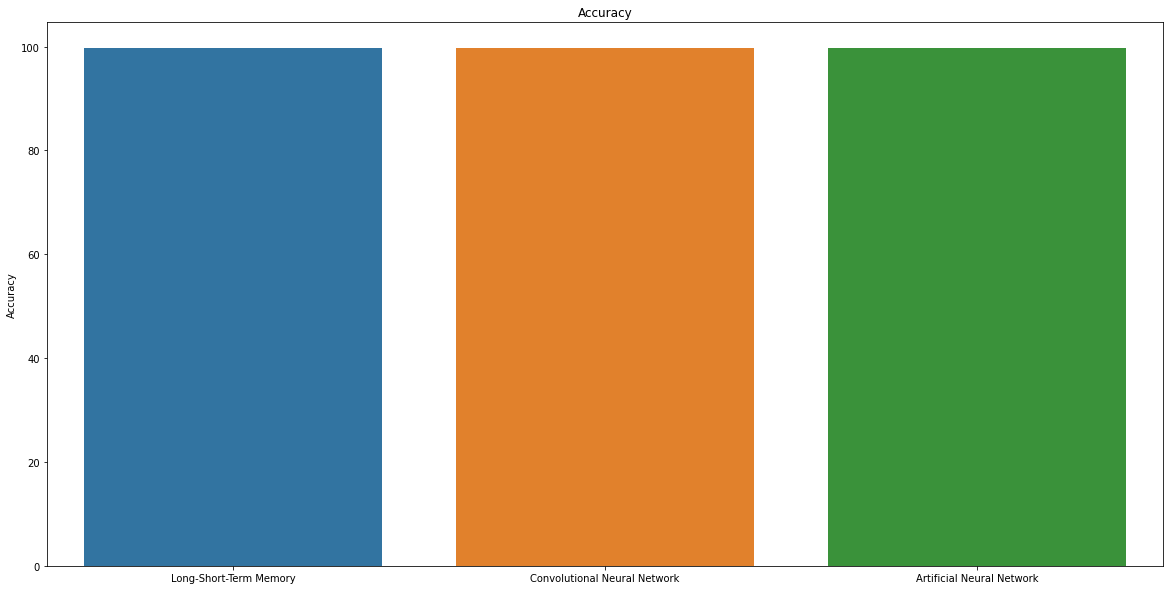

In [ ]:
#visulizing Accuuracy with graph
fig = plt.gcf()
fig.set_size_inches(20, 10)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(1,1,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

In [ ]:
df1=df.reset_index()['Adj Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(589, 148)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(488, 100)
(488,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(47, 100)
(47,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.5730174516314535

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3.428211991895037

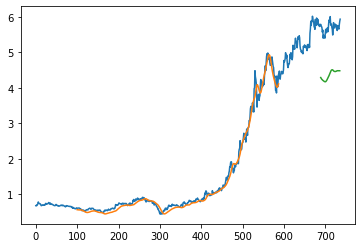

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

148

In [ ]:
x_input=test_data[48:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.9014761820119275,
 0.8907283443770616,
 0.8495274032910748,
 0.8334054674749757,
 0.8298226755662202,
 0.8190746585675541,
 0.8244487567487873,
 0.815492046022599,
 0.815492046022599,
 0.8101179478413657,
 0.847736097018597,
 0.8423621782011642,
 0.847736097018597,
 0.8549013221085078,
 0.8423621782011642,
 0.8459447907461194,
 0.8495274032910748,
 0.8387793862924087,
 0.8369880800199311,
 0.8262400630212648,
 0.8566928077447855,
 0.8549013221085078,
 0.8549013221085078,
 0.8405706925648863,
 0.8584841140172632,
 0.8423621782011642,
 0.9140156846468713,
 0.9355117186442035,
 0.9749211740939125,
 0.9534251400965805,
 0.9749211740939125,
 0.9749211740939125,
 1.0,
 0.989251803637534,
 0.9713383821851569,
 0.9713383821851569,
 0.9462597356428697,
 0.944468429370392,
 0.9337202330079257,
 0.9838778848201009,
 0.9641731570952463,
 0.9534251400965805,
 0.9910431099100114,
 0.9856691910925786,
 0.9605903651864911,
 0.9838778848201009,
 0.955216446369058,
 0.9587990589140132,
 0.95879905891

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

737

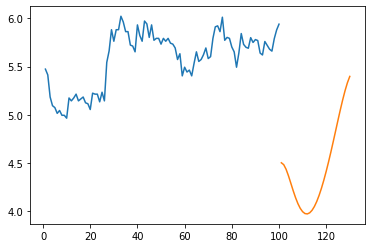

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[637:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

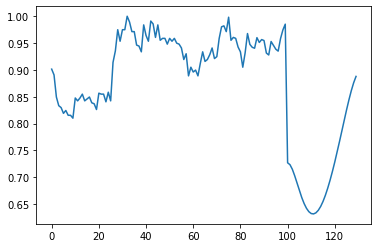

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[637:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


In [ ]:
pd.DataFrame(df3[737:])

,0
0,4.500297
1,4.480708
2,4.433154
3,4.366027
4,4.289308
5,4.211572
6,4.139224
7,4.076919
8,4.027463
9,3.992605


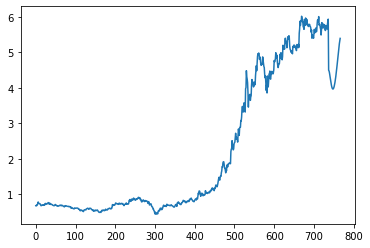

In [ ]:
plt.plot(df3)